In [3]:
# Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, cross_validate

# Metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, RocCurveDisplay
from sklearn.datasets import make_classification

# Pre-Processing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# SMOTE
from imblearn.over_sampling import SMOTE

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Load dataset
df = pd.read_csv("diabetes.csv")

# Create a PatientID column
df["PatientID"] = df.index + 1  # Start IDs from 1 instead of 0

# Ensure 'PatientID' is set as the index
df = df.set_index("PatientID")

# Display DataFrame to confirm
print(df.head())

           Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
PatientID                                                                      
1                    6      148             72             35        0  33.6   
2                    1       85             66             29        0  26.6   
3                    8      183             64              0        0  23.3   
4                    1       89             66             23       94  28.1   
5                    0      137             40             35      168  43.1   

           DiabetesPedigreeFunction  Age  Outcome  
PatientID                                          
1                             0.627   50        1  
2                             0.351   31        0  
3                             0.672   32        1  
4                             0.167   21        0  
5                             2.288   33        1  


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 768 entries, 1 to 768
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [7]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [8]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [9]:
df["Outcome"].value_counts()*100/len(df)

Outcome
0    65.104167
1    34.895833
Name: count, dtype: float64

In [10]:
df.groupby("Outcome").agg({"Pregnancies":"mean"})

,Pregnancies
Outcome,
0,3.298000
1,4.865672


In [11]:
df.groupby("Outcome").agg({"Age":"mean"})

,Age
Outcome,
0,31.190000
1,37.067164


In [12]:
df.groupby("Outcome").agg({"Age":"max"})

,Age
Outcome,
0,81
1,70


In [13]:
df.groupby("Outcome").agg({"Insulin": "mean"})

,Insulin
Outcome,
0,68.792000
1,100.335821


In [14]:
df.groupby("Outcome").agg({"Glucose": "mean"})

,Glucose
Outcome,
0,109.980000
1,141.257463


In [15]:
df.groupby("Outcome").agg({"Glucose": "max"})

,Glucose
Outcome,
0,197
1,199


In [16]:
df.groupby("Outcome").agg({"BMI": "mean"})

,BMI
Outcome,
0,30.304200
1,35.142537


In [17]:
df.duplicated().sum()

0

In [18]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [19]:
(df[df.columns] == 0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [20]:
for i in ["Glucose","BMI","Insulin","BloodPressure"]:
    df[i].replace({0:df[i].median()},inplace = True)

In [21]:
(df[df.columns] == 0).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness               227
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

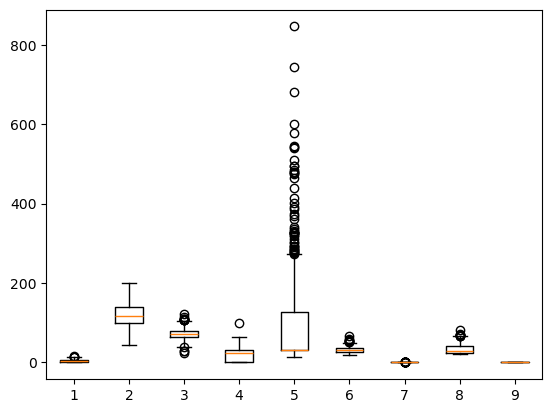

In [22]:
plt.boxplot(df);

In [23]:
def outlier_treatment():
    l = ["BMI","Glucose","SkinThickness","Age","BloodPressure","Insulin","Pregnancies","DiabetesPedigreeFunction"]
    for i in l:
        x = np.quantile(df[i],[0.25,0.75])
        iqr = x[1]-x[0]
        uw = x[1]+1.5*iqr
        lw = x[0]-1.5*iqr
        df[i]  = np.where(df[i]>uw,uw,(np.where(df[i]<lw,lw,df[i])))
        
outlier_treatment()

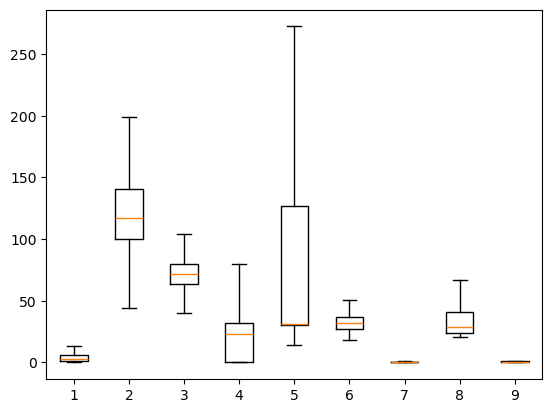

In [24]:
plt.boxplot(df);

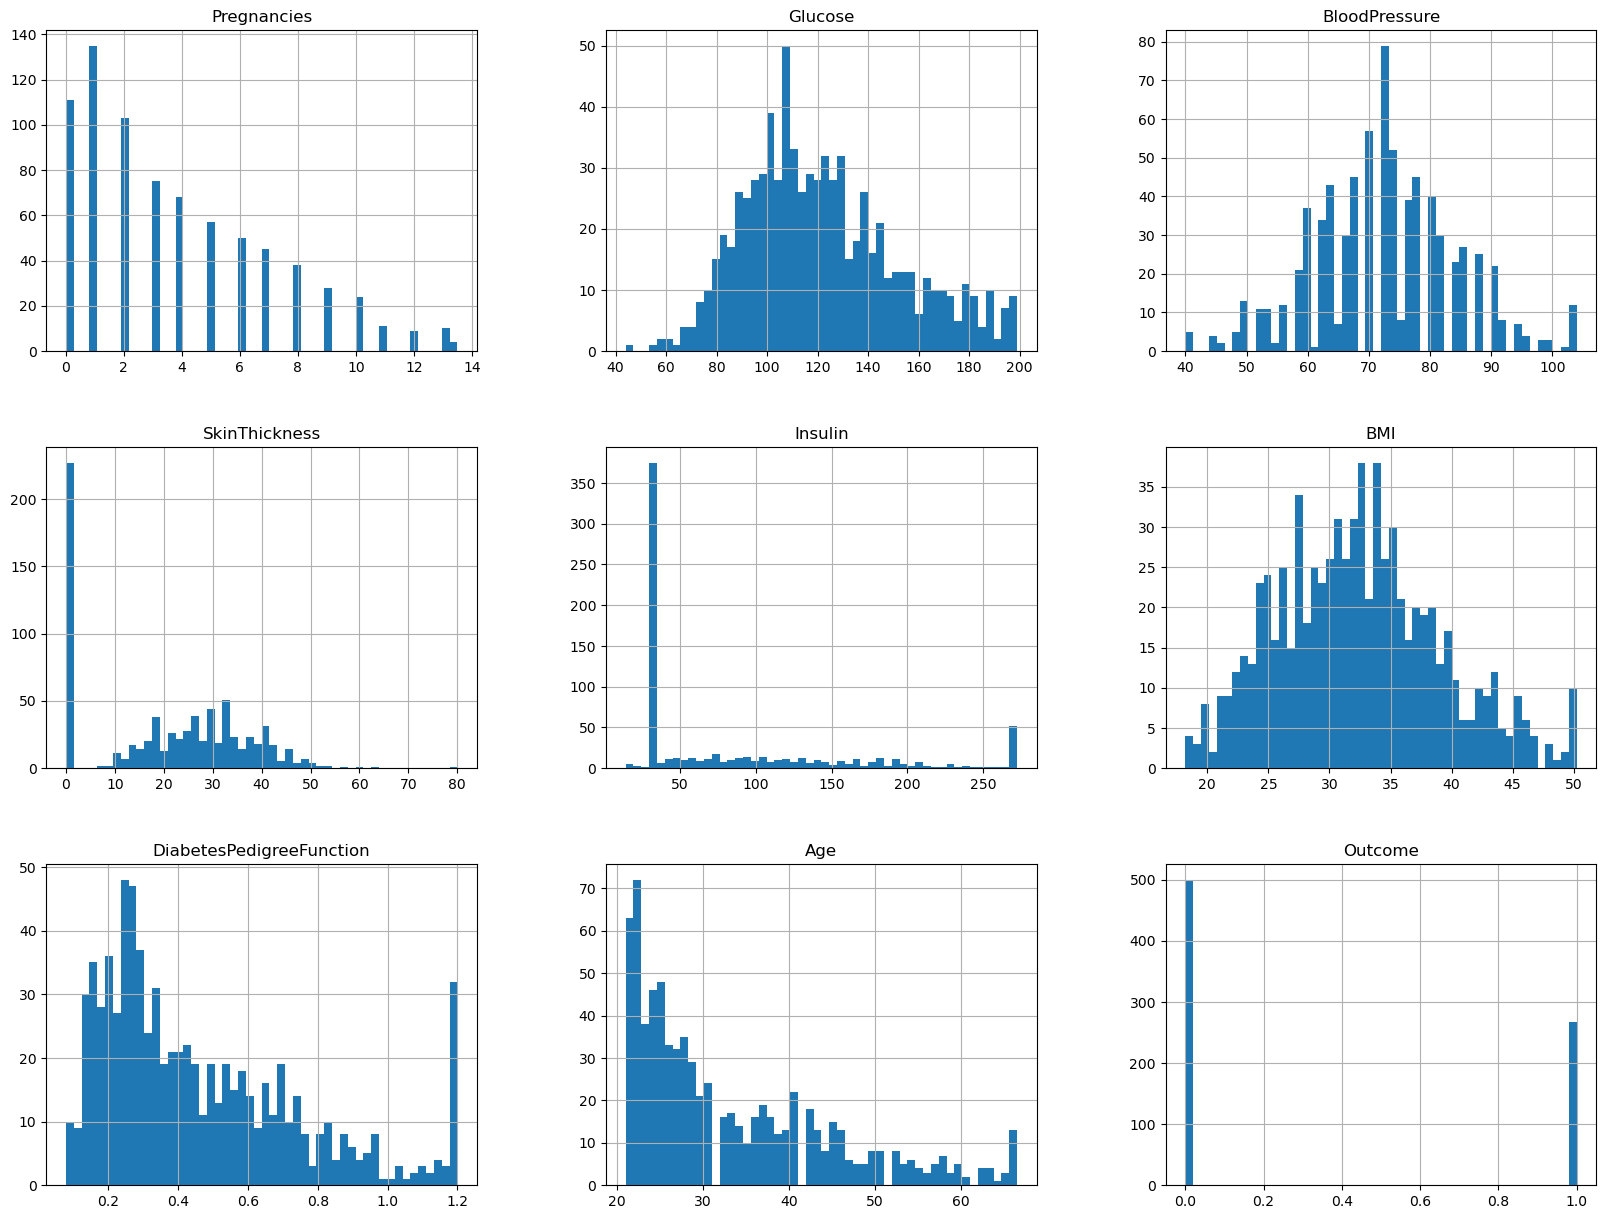

In [25]:
df.hist(bins=50, figsize=(20,15));

In [26]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [27]:
# Define numerical features
numeric_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                    'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Define preprocessing for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Impute missing values with median
    ('scaler', StandardScaler())  # Standardize the features
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

In [28]:
corrs = df.corr()
corrs

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.126856,0.210906,-0.084349,-0.061192,0.027145,-0.017398,0.549695,0.220392
Glucose,0.126856,1.000000,0.220199,0.071090,0.338429,0.233953,0.118457,0.268912,0.492782
BloodPressure,0.210906,0.220199,1.000000,0.013501,-0.033847,0.286410,0.012305,0.332898,0.168971
SkinThickness,-0.084349,0.071090,0.013501,1.000000,0.464759,0.382740,0.177920,-0.119170,0.073125
Insulin,-0.061192,0.338429,-0.033847,0.464759,1.000000,0.207474,0.191870,-0.040448,0.147295
BMI,0.027145,0.233953,0.286410,0.382740,0.207474,1.000000,0.138541,0.035861,0.313030
DiabetesPedigreeFunction,-0.017398,0.118457,0.012305,0.177920,0.191870,0.138541,1.000000,0.047289,0.184969
Age,0.549695,0.268912,0.332898,-0.119170,-0.040448,0.035861,0.047289,1.000000,0.242702
Outcome,0.220392,0.492782,0.168971,0.073125,0.147295,0.313030,0.184969,0.242702,1.000000


In [29]:
NewBMI = pd.Series(["Underweight", "Normal", "Overweight", "Obesity 1", "Obesity 2", "Obesity 3"], dtype = "category")
df["NewBMI"] = NewBMI
df.loc[df["BMI"] < 18.5, "NewBMI"] = NewBMI[0]
df.loc[(df["BMI"] > 18.5) & (df["BMI"] <= 24.9), "NewBMI"] = NewBMI[1]
df.loc[(df["BMI"] > 24.9) & (df["BMI"] <= 29.9), "NewBMI"] = NewBMI[2]
df.loc[(df["BMI"] > 29.9) & (df["BMI"] <= 34.9), "NewBMI"] = NewBMI[3]
df.loc[(df["BMI"] > 34.9) & (df["BMI"] <= 39.9), "NewBMI"] = NewBMI[4]
df.loc[df["BMI"] > 39.9 ,"NewBMI"] = NewBMI[5]

In [30]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI
PatientID,,,,,,,,,,
1,6.0,148.0,72.0,35.0,30.5,33.6,0.627,50.0,1,Obesity 1
2,1.0,85.0,66.0,29.0,30.5,26.6,0.351,31.0,0,Overweight
3,8.0,183.0,64.0,0.0,30.5,23.3,0.672,32.0,1,Normal
4,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0,Overweight
5,0.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0,1,Obesity 3


In [31]:
def set_insulin(row):
    if row["Insulin"] >= 16 and row["Insulin"] <= 166:
        return "Normal"
    else:
        return "Abnormal"

In [32]:
df = df.assign(NewInsulinScore=df.apply(set_insulin, axis=1))

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore
PatientID,,,,,,,,,,,
1,6.0,148.0,72.0,35.0,30.5,33.6,0.627,50.0,1,Obesity 1,Normal
2,1.0,85.0,66.0,29.0,30.5,26.6,0.351,31.0,0,Overweight,Normal
3,8.0,183.0,64.0,0.0,30.5,23.3,0.672,32.0,1,Normal,Normal
4,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0,Overweight,Normal
5,0.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0,1,Obesity 3,Abnormal


In [33]:
NewGlucose = pd.Series(["Low", "Normal", "Overweight", "Secret", "High"], dtype = "category")
df["NewGlucose"] = NewGlucose
df.loc[df["Glucose"] <= 70, "NewGlucose"] = NewGlucose[0]
df.loc[(df["Glucose"] > 70) & (df["Glucose"] <= 99), "NewGlucose"] = NewGlucose[1]
df.loc[(df["Glucose"] > 99) & (df["Glucose"] <= 126), "NewGlucose"] = NewGlucose[2]
df.loc[df["Glucose"] > 126 ,"NewGlucose"] = NewGlucose[3]

In [34]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore,NewGlucose
PatientID,,,,,,,,,,,,
1,6.0,148.0,72.0,35.0,30.5,33.6,0.627,50.0,1,Obesity 1,Normal,Secret
2,1.0,85.0,66.0,29.0,30.5,26.6,0.351,31.0,0,Overweight,Normal,Normal
3,8.0,183.0,64.0,0.0,30.5,23.3,0.672,32.0,1,Normal,Normal,Secret
4,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0,Overweight,Normal,Normal
5,0.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0,1,Obesity 3,Abnormal,Secret


In [35]:
df = pd.get_dummies(df, columns =["NewBMI","NewInsulinScore", "NewGlucose"], drop_first = True)

In [36]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
PatientID,,,,,,,,,,,,,,,,,,,
1,6.0,148.0,72.0,35.0,30.5,33.6,0.627,50.0,1,True,False,False,False,False,True,False,False,False,True
2,1.0,85.0,66.0,29.0,30.5,26.6,0.351,31.0,0,False,False,False,True,False,True,False,True,False,False
3,8.0,183.0,64.0,0.0,30.5,23.3,0.672,32.0,1,False,False,False,False,False,True,False,False,False,True
4,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0,False,False,False,True,False,True,False,True,False,False
5,0.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0,1,False,False,True,False,False,False,False,False,False,True


In [37]:
df.drop(['NewBMI_Obesity 1','NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight','NewBMI_Underweight',
             'NewInsulinScore_Normal','NewGlucose_Low','NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret'], axis = 1, inplace=True)

In [36]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
PatientID,,,,,,,,,
1,6.0,148.0,72.0,35.0,30.5,33.6,0.627,50.0,1
2,1.0,85.0,66.0,29.0,30.5,26.6,0.351,31.0,0
3,8.0,183.0,64.0,0.0,30.5,23.3,0.672,32.0,1
4,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
5,0.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0,1


In [39]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.837240,3.344157,0.000,1.00000,3.0000,6.00000,13.500
Glucose,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.000
BloodPressure,768.0,72.358073,11.697097,40.000,64.00000,72.0000,80.00000,104.000
SkinThickness,768.0,20.511719,15.844744,0.000,0.00000,23.0000,32.00000,80.000
Insulin,768.0,86.139811,76.287377,14.000,30.50000,31.2500,127.25000,272.375
BMI,768.0,32.389063,6.667627,18.200,27.50000,32.0000,36.60000,50.250
DiabetesPedigreeFunction,768.0,0.458914,0.285596,0.078,0.24375,0.3725,0.62625,1.200
Age,768.0,33.199870,11.628404,21.000,24.00000,29.0000,41.00000,66.500
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.000


In [37]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.126856,0.210906,-0.084349,-0.061192,0.027145,-0.017398,0.549695,0.220392
Glucose,0.126856,1.000000,0.220199,0.071090,0.338429,0.233953,0.118457,0.268912,0.492782
BloodPressure,0.210906,0.220199,1.000000,0.013501,-0.033847,0.286410,0.012305,0.332898,0.168971
SkinThickness,-0.084349,0.071090,0.013501,1.000000,0.464759,0.382740,0.177920,-0.119170,0.073125
Insulin,-0.061192,0.338429,-0.033847,0.464759,1.000000,0.207474,0.191870,-0.040448,0.147295
BMI,0.027145,0.233953,0.286410,0.382740,0.207474,1.000000,0.138541,0.035861,0.313030
DiabetesPedigreeFunction,-0.017398,0.118457,0.012305,0.177920,0.191870,0.138541,1.000000,0.047289,0.184969
Age,0.549695,0.268912,0.332898,-0.119170,-0.040448,0.035861,0.047289,1.000000,0.242702
Outcome,0.220392,0.492782,0.168971,0.073125,0.147295,0.313030,0.184969,0.242702,1.000000


In [38]:
df.corr()['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.492782
BMI                         0.313030
Age                         0.242702
Pregnancies                 0.220392
DiabetesPedigreeFunction    0.184969
BloodPressure               0.168971
Insulin                     0.147295
SkinThickness               0.073125
Name: Outcome, dtype: float64

Text(0.5, 1.0, 'correlation of feature')

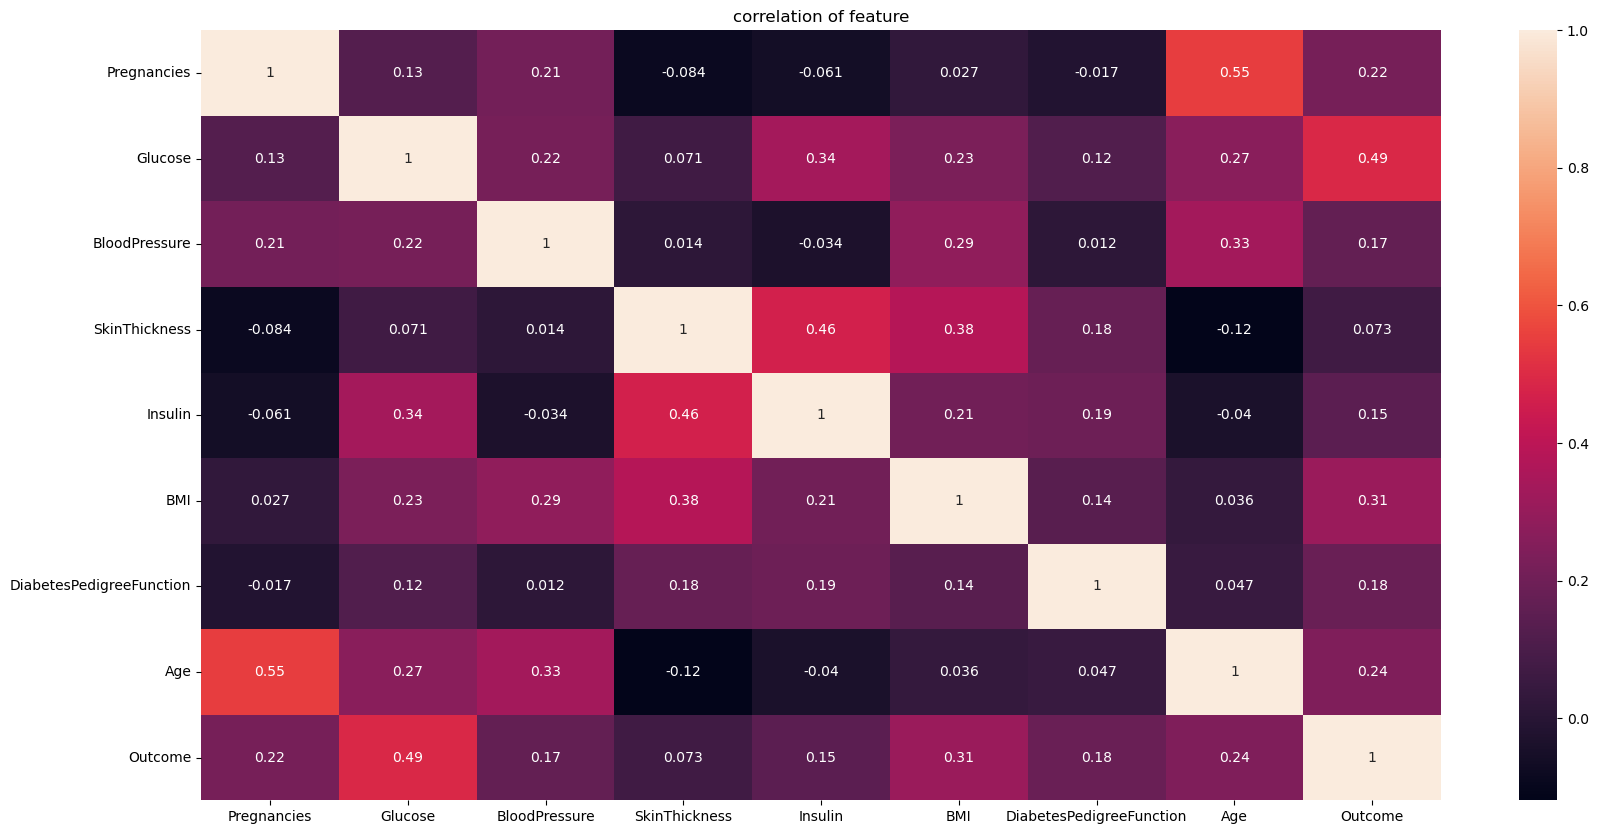

In [39]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), annot=True)
plt.title("correlation of feature")

In [40]:
# Fit and transform the dataset
preprocessed_X_train = preprocessor.fit_transform(df)

# Use only numeric feature names since there are no categorical/binary features
encoded_feature_names = numeric_features

# Convert preprocessed data to a DataFrame
df_final = pd.DataFrame(preprocessed_X_train, columns=encoded_feature_names)

# Add the target column back
df_final["Outcome"] = df["Outcome"].values

df_final.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.647150,0.866045,-0.030632,0.914986,-0.729820,0.181733,0.588927,1.445691,1
1,-0.848970,-1.205066,-0.543914,0.536065,-0.729820,-0.868800,-0.378101,-0.189304,0
2,1.245598,2.016662,-0.715008,-1.295388,-0.729820,-1.364051,0.746595,-0.103252,1
3,-0.848970,-1.073567,-0.543914,0.157144,0.103101,-0.643686,-1.022787,-1.049828,0
4,-1.148194,0.504422,-2.768136,0.914986,1.073750,1.607456,2.596563,-0.017199,1


In [61]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
PatientID,,,,,,,,,
1,6.0,148.0,72.0,35.0,30.5,33.6,0.627,50.0,1
2,1.0,85.0,66.0,29.0,30.5,26.6,0.351,31.0,0
3,8.0,183.0,64.0,0.0,30.5,23.3,0.672,32.0,1
4,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
5,0.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0,1


In [54]:
# Step 1: Get the data (NOTE: this is the original dataframe, not the one used for the correlations)
X = df.drop(columns=["Outcome"])
y = df.Outcome


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y) # stratify=True maintains target class percentages
print(X_train.shape, X_test.shape)

smote = SMOTE(random_state=5)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

(576, 8) (192, 8)


In [55]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
PatientID,,,,,,,,
611,3.0,106.0,54.0,21.0,158.0,30.9,0.292,24.0
682,0.0,162.0,76.0,36.0,30.5,49.6,0.364,26.0
707,10.0,115.0,72.0,0.0,30.5,32.0,0.261,30.0
282,10.0,129.0,76.0,28.0,122.0,35.9,0.280,39.0
626,4.0,90.0,88.0,47.0,54.0,37.7,0.362,29.0


In [56]:
# Function for Classification
# THE ROC CURVE CODE WILL BREAK FOR MULTI_CLASS PROBLEMS
def doClassification(model, X_train, X_test, y_train, y_test):
    # Step 3: Fit the model
    model.fit(X_train, y_train)
    
    # Step 4: Evaluate the model
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    train_proba = model.predict_proba(X_train)[:, 1]
    test_proba = model.predict_proba(X_test)[:, 1]

    # Generate metrics TRAIN
    train_cf = confusion_matrix(y_train, train_preds)
    train_cr = classification_report(y_train, train_preds)
    train_auc = roc_auc_score(y_train, train_proba)
    
    train_results = f"""TRAIN METRICS
    Confusion Matrix: 
    {train_cf}
    
    AUC: {train_auc}

    Classification Report:
    {train_cr}
    """
    
    print(train_results)

    # Generate metrics TEST
    test_cf = confusion_matrix(y_test, test_preds)
    test_cr = classification_report(y_test, test_preds)
    test_auc = roc_auc_score(y_test, test_proba)
    
    test_results = f"""TEST METRICS
    Confusion Matrix: 
    {test_cf}
    
    AUC: {test_auc}

    Classification Report:
    {test_cr}
    """
    
    print(test_results)

    # VISUALIZE TEST RESULTS
    # Confusion Matrix
    plt.figure(figsize=(4, 4))
    sns.heatmap(test_cf, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=['Predicted Negative', 'Predicted Positive'], 
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test.values, test_proba)
    
    # Set figure size
    plt.figure(figsize=(6, 6))
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {test_auc:.2f})')
    
    # Plot the diagonal reference line
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    
    # Titles and labels
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    # Add grid and legend
    plt.grid(linestyle="--", color="lightgrey", alpha=0.75)
    plt.legend(loc="lower right")
    
    # Display the plot
    plt.show()

TRAIN METRICS
    Confusion Matrix: 
    [[333  42]
 [ 78 123]]
    
    AUC: 0.8586003316749586

    Classification Report:
                  precision    recall  f1-score   support

           0       0.81      0.89      0.85       375
           1       0.75      0.61      0.67       201

    accuracy                           0.79       576
   macro avg       0.78      0.75      0.76       576
weighted avg       0.79      0.79      0.79       576

    
TEST METRICS
    Confusion Matrix: 
    [[113  12]
 [ 32  35]]
    
    AUC: 0.8130149253731344

    Classification Report:
                  precision    recall  f1-score   support

           0       0.78      0.90      0.84       125
           1       0.74      0.52      0.61        67

    accuracy                           0.77       192
   macro avg       0.76      0.71      0.73       192
weighted avg       0.77      0.77      0.76       192

    


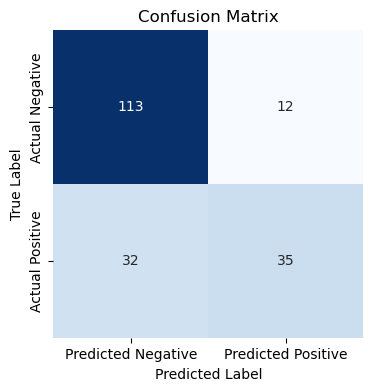

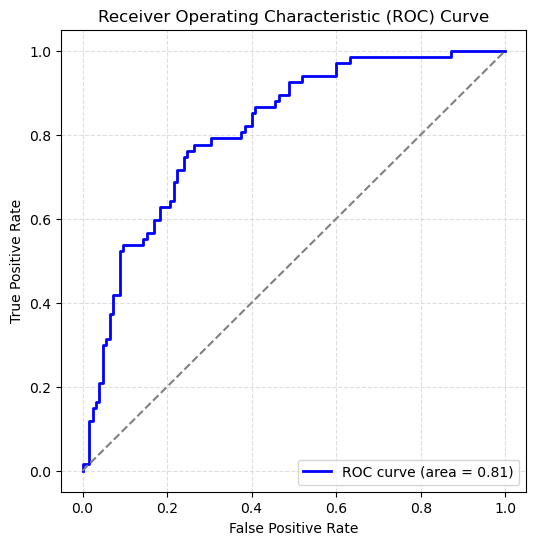

In [57]:
lr = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Do Machine Learning
doClassification(lr, X_train, X_test, y_train, y_test)

In [58]:
# Create a pipeline with a scaler and a logistic regression model
lr = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Perform 5-fold cross-validation with roc_auc scoring
cv = StratifiedKFold(n_splits=5)
cv_scores = cross_val_score(lr, X, y, cv=cv, scoring='roc_auc')

# Output the results
print(f"Cross-validation AUC scores: {cv_scores}")
print(f"Mean AUC: {np.mean(cv_scores):.3f}")

Cross-validation AUC scores: [0.81611111 0.80444444 0.84407407 0.88962264 0.84566038]
Mean AUC: 0.840


In [46]:
# Create a pipeline with a scaler and a logistic regression model
ada = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', AdaBoostClassifier(random_state=42))
])

# Perform 5-fold cross-validation with roc_auc scoring
cv = StratifiedKFold(n_splits=5)
cv_scores = cross_val_score(ada, X, y, cv=cv, scoring='roc_auc')

# Output the results
print(f"Cross-validation AUC scores: {cv_scores}")
print(f"Mean AUC: {np.mean(cv_scores):.3f}")

Cross-validation AUC scores: [0.79194444 0.75555556 0.84231481 0.84773585 0.82962264]
Mean AUC: 0.813


In [47]:
# Create a pipeline with a scaler and a logistic regression model
gb = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

# Perform 5-fold cross-validation with roc_auc scoring
cv = StratifiedKFold(n_splits=5)
cv_scores = cross_val_score(gb, X, y, cv=cv, scoring='roc_auc')

# Output the results
print(f"Cross-validation AUC scores: {cv_scores}")
print(f"Mean AUC: {np.mean(cv_scores):.3f}")

Cross-validation AUC scores: [0.82685185 0.78       0.83962963 0.87981132 0.80811321]
Mean AUC: 0.827


In [59]:
# Retrain the model on the ENTIRE dataset
lr = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])
lr.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Pregnancies', 'Glucose',
                                                   'BloodPressure',
                                                   'SkinThickness', 'Insulin',
                                                   'BMI',
                                                   'DiabetesPedigreeFunction',
                                                   'Age'])])),
                ('classifier', LogisticRegression())])

In [60]:
# Save off my models
import pickle

# Model
pickle.dump(lr, open("Pima_Indian_Heritage_Diabetes_model_pipeline.h5", 'wb'))